# Quality Assurance of the inpute trees

This notebook shows how to compute some basic Quality Assurance (QA) distributions from the input trees.
Most of the heavy lifting happens in a macro, called [FilteredTreesQA.C](https://gitlab.cern.ch/IML-WG/IMLWorkshop2017-Challenge/blob/master/Examples/FilteredTreesQA.C). You can look at the source code of the macro (click the previous link) to see how to access the information in the input root tree.

For details on the date format, the [README](https://gitlab.cern.ch/IML-WG/IMLWorkshop2017-Challenge/blob/master/README.md) file.

The macro produces a set of standard plots, but also gives you access to the histograms used to produce those plots. This are the histograms produced by the macro:

```C++
enum {kFileQuarks, kFileGluons, kNFiles};

enum {kHistJet, 
      kHistTracks, 
      kHistTowers, 
      kNHistTypes};

TH1F * hPtE [kNFiles][kNHistTypes] = {{0}}; // Contains pt for jets and tracks, E for towers
TH1F * hEta [kNFiles][kNHistTypes]  = {{0}};
TH1F * hPhi [kNFiles][kNHistTypes]  = {{0}};
TH1F * hNtracks[kNFiles];
TH1F * hNtowers[kNFiles];
TH1F * hMass   [kNFiles];
```

In [1]:
// *** 1. Load and compile the macro *** 
// This macro shows how to read events from the quarks and gluons
// tree, and plots some basic distributions of jets and constituents
// as a simple QA.  You can either run this macro from the root
// prompt, or have a look to the TreeQA.pynb notebook in this folder.

// Don't forget to source the correct software stack before running
// the macro, e.g.
// source /cvmfs/sft.cern.ch/lcg/views/dev3/latest/x86_64-slc6-gcc49-opt/setup.sh

// This macro should be compiled (e.g. with '.L FilteredTreesQA.C+')

gROOT->LoadMacro("FilteredTreesQA.C+");

In [2]:
// *** 2. Run the macro ***
// The macro has 3 arguments:
// Bool_t doDraw = kTRUE      -> if true, draws the QA histograms on a set of standard canvases
// const char * histoFile = 0 -> if != 0, saves the hisograms to histoFile
// Int_t njets = -1           -> number of jets to be processed, if < 0 all jets are processed
FilteredTreesQA(kTRUE, 0, -1); 

Running QA


Warning in <TFile::Init>: file /eos/project/i/iml/IMLChallengeQG/quarks_standard//REDUCED_quarks_248.root probably not closed, trying to recover
Warning in <TFile::Init>: no keys recovered, file has been made a Zombie
Warning in <TFile::Init>: file /eos/project/i/iml/IMLChallengeQG/quarks_standard//REDUCED_quarks_316.root probably not closed, trying to recover
Warning in <TFile::Init>: no keys recovered, file has been made a Zombie
Warning in <TFile::Init>: file /eos/project/i/iml/IMLChallengeQG/quarks_standard//REDUCED_quarks_95.root probably not closed, trying to recover
Warning in <TFile::Init>: no keys recovered, file has been made a Zombie


 Processing Quarks (Standard) [4627484/4627484]


Warning in <TFile::Init>: file /eos/project/i/iml/IMLChallengeQG/gluons_standard/REDUCED_gluons_1685.root probably not closed, trying to recover
Warning in <TFile::Init>: no keys recovered, file has been made a Zombie


 Processing Gluons (Standard) [1988877/1988877]
 Processing Quarks (Modified) [2188149/2188149]
 Processing Gluons (Modified) [952420/952420]


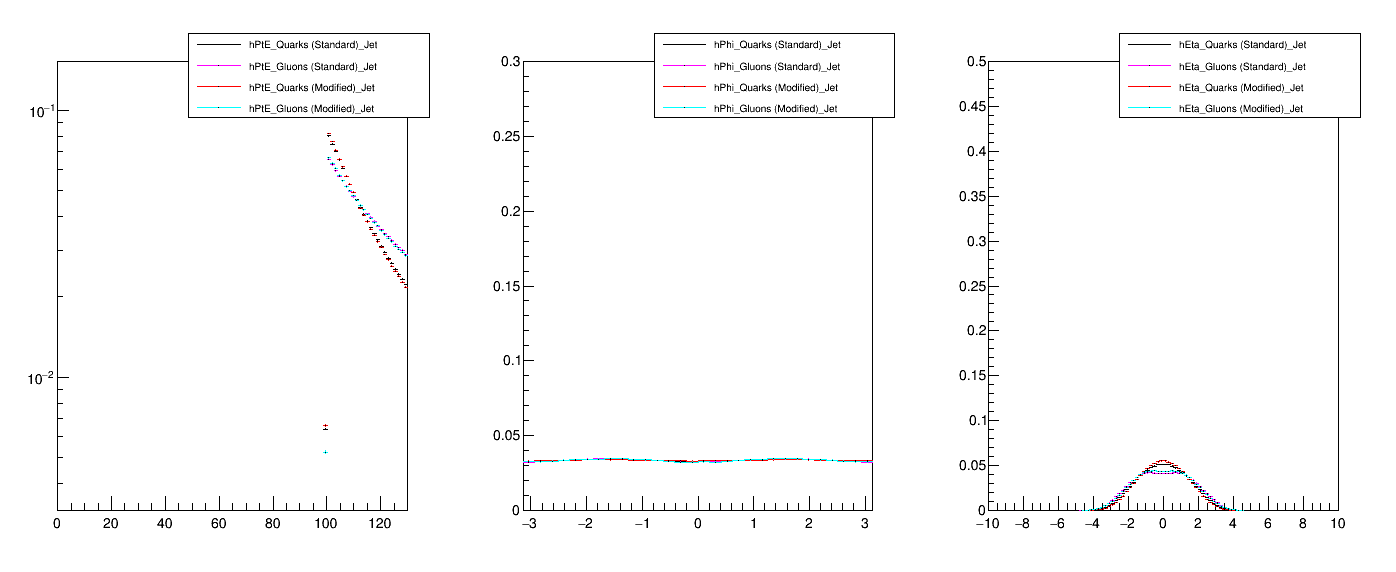

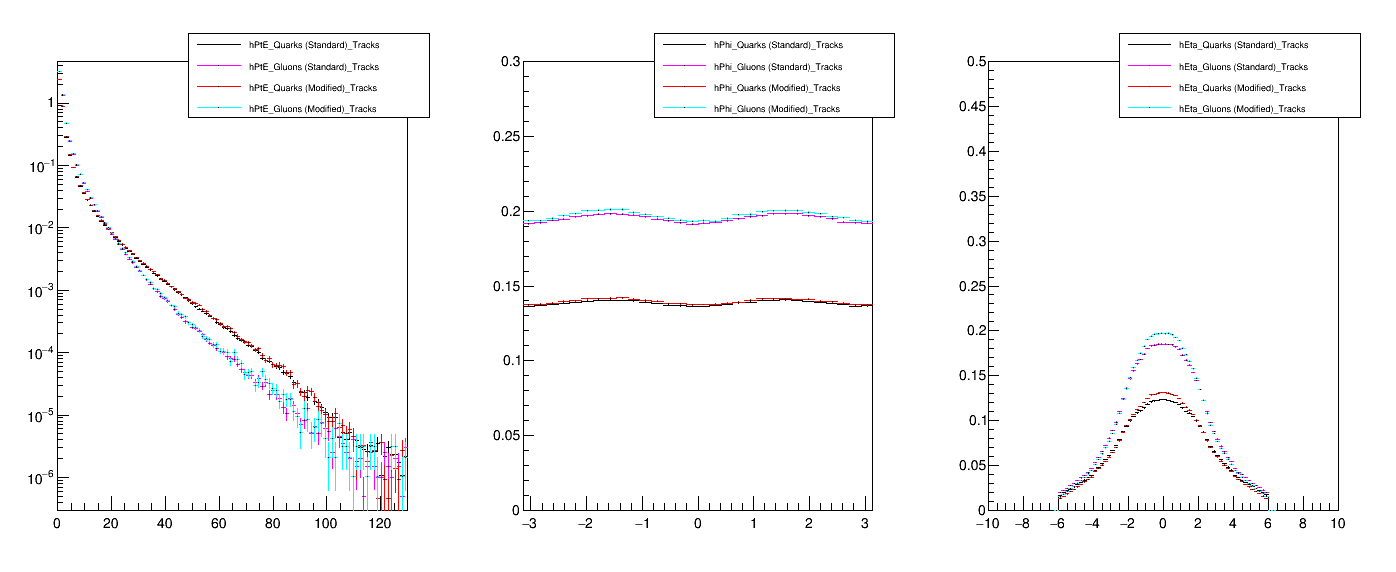

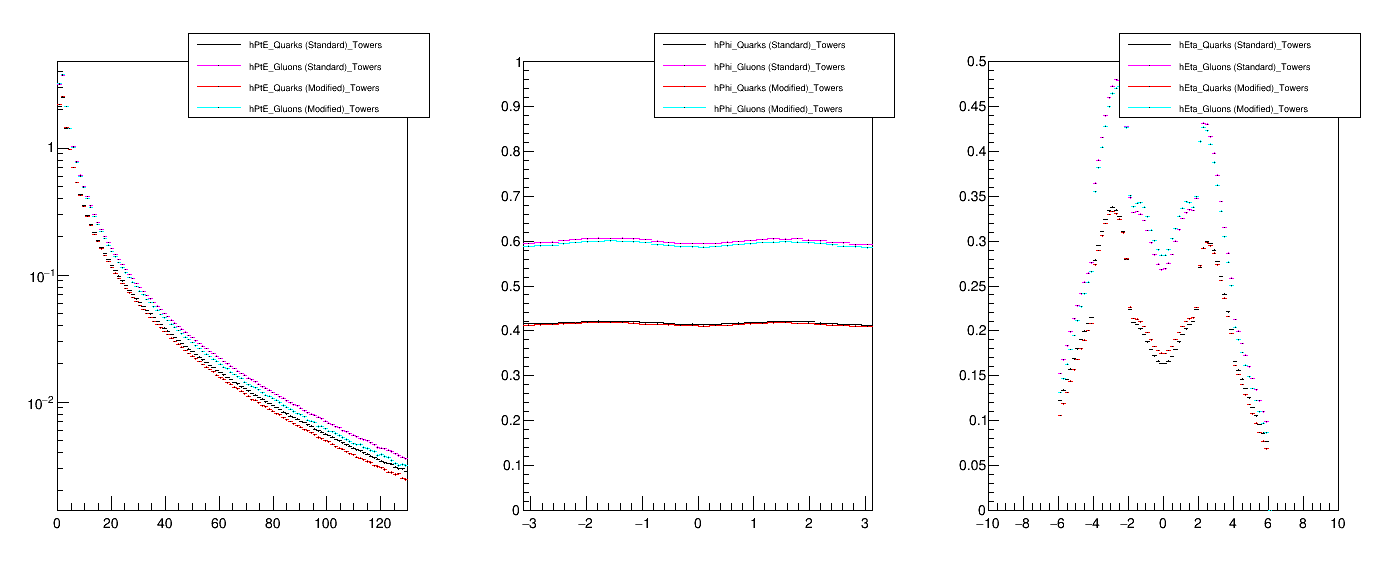

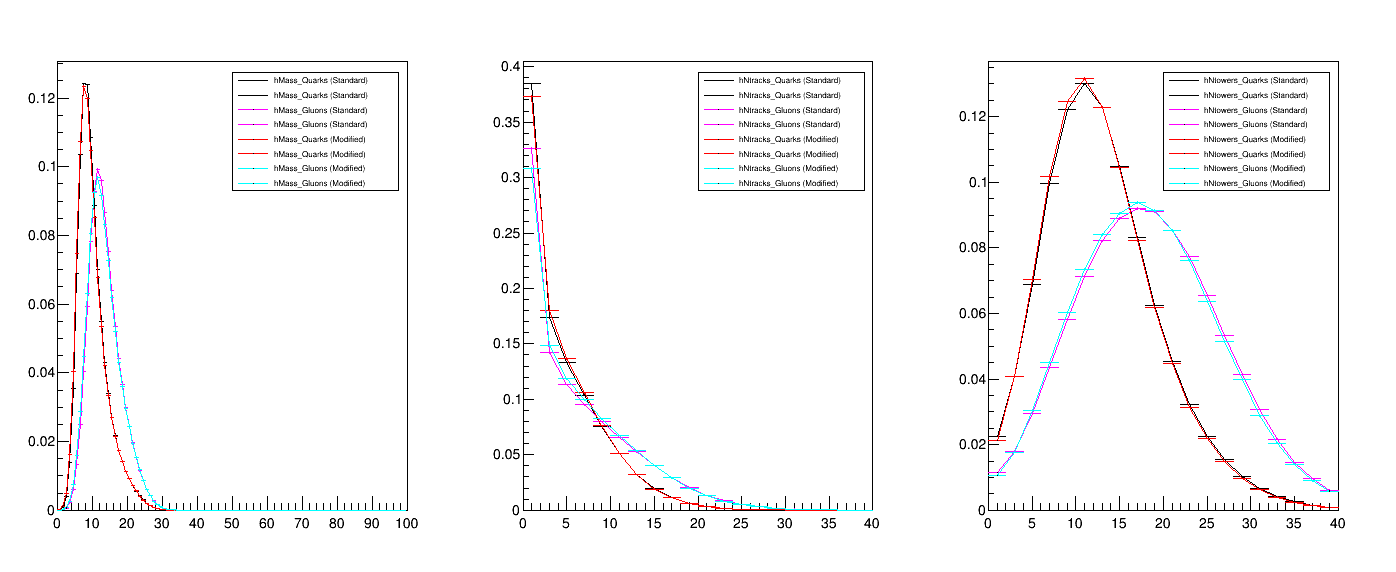

In [3]:
// *** 3. Show the default QA plots ***
// the peculiar shape in the eta distribution of towers is due to overlaps in the barrel/endcap region
// All histograms are normalized "per jet"
for(int icanv = 0; icanv < kNCanvas; icanv++) {
    canvas[icanv]->Draw();
}

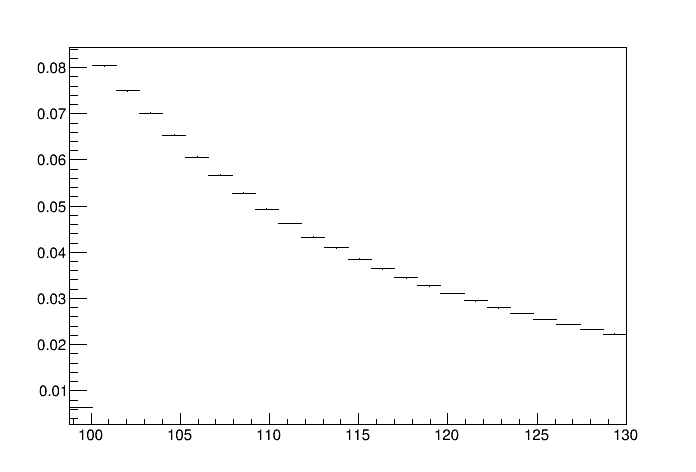

In [4]:
// An example on how to access directly the histograms
TCanvas c;
hPtE[kFileQuarks][kHistJet]->GetXaxis()->SetRangeUser(100,130);
hPtE[kFileQuarks][kHistJet]->Draw();
c.Draw()